# LAB-1
### Feature Extraction 

- [CountVectorizer](#CountVectorizer)
- [TfidfVectorizer](#TfidfVectorizer)

### Models

- [Naive Bayes](#Naive-Bayes)
- [SVM](#SVM)
- [Random Forest](#Random-Forest)
- [Decision Tree](#Decision-Tree)
- [Multi Layer Perceptron](#Multi-Layer-Perceptron)

### Plots

- [Accuracy Plot TfidfVectorizer](#Plot-TfidfVectorizer)
- [Accuracy Plot CountVectorizer](#Plot-CountVectorizer)

### Author

- [Navaneeth Sivakumar](https://github.com/Sivakumar-Navaneeth)

## Read File

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("Dataset/data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## Train Test Split

In [2]:
from sklearn.model_selection import train_test_split

x = df["Sentence"].values
y = df["Sentiment"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# CountVectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

fe = CountVectorizer()
x_train = fe.fit_transform(x_train)
x_test = fe.transform(x_test)

models = []
acc = []

# SVM

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X=x_train,y=y_train)

pred = svm.predict(x_test)
svm_acc = accuracy_score(y_pred=pred,y_true=y_test)
models.append("SVC")
acc.append(svm_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.31      0.09      0.14       170
     neutral       0.69      0.89      0.78       617
    positive       0.76      0.63      0.69       382

    accuracy                           0.69      1169
   macro avg       0.58      0.54      0.53      1169
weighted avg       0.65      0.69      0.65      1169



## Naive Bayes

In [5]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X=x_train,y=y_train)

pred = nb.predict(x_test)
nb_acc = accuracy_score(y_pred=pred,y_true=y_test)
models.append("NB")
acc.append(nb_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.45      0.36      0.40       170
     neutral       0.73      0.81      0.77       617
    positive       0.72      0.65      0.69       382

    accuracy                           0.69      1169
   macro avg       0.63      0.61      0.62      1169
weighted avg       0.69      0.69      0.69      1169



## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X=x_train,y=y_train)

pred = dt.predict(x_test)
dt_acc = accuracy_score(y_pred=pred,y_true=y_test)
models.append("DT")
acc.append(dt_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.18      0.20      0.19       170
     neutral       0.64      0.66      0.65       617
    positive       0.65      0.60      0.62       382

    accuracy                           0.57      1169
   macro avg       0.49      0.48      0.49      1169
weighted avg       0.58      0.57      0.57      1169



## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X=x_train,y=y_train)

pred = rf.predict(x_test)
fr_acc = accuracy_score(y_pred=pred,y_true=y_test)
models.append("RF")
acc.append(fr_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.12      0.08      0.10       170
     neutral       0.66      0.81      0.73       617
    positive       0.79      0.61      0.69       382

    accuracy                           0.64      1169
   macro avg       0.52      0.50      0.51      1169
weighted avg       0.62      0.64      0.62      1169



## Multi Layer Perceptron

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X=x_train,y=y_train)

pred = mlp.predict(x_test)
mlp_acc = accuracy_score(y_pred=pred,y_true=y_test)
models.append("MLP")
acc.append(mlp_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.24      0.23      0.24       170
     neutral       0.69      0.73      0.71       617
    positive       0.75      0.70      0.73       382

    accuracy                           0.65      1169
   macro avg       0.56      0.55      0.56      1169
weighted avg       0.64      0.65      0.64      1169



# Plot CountVectorizer

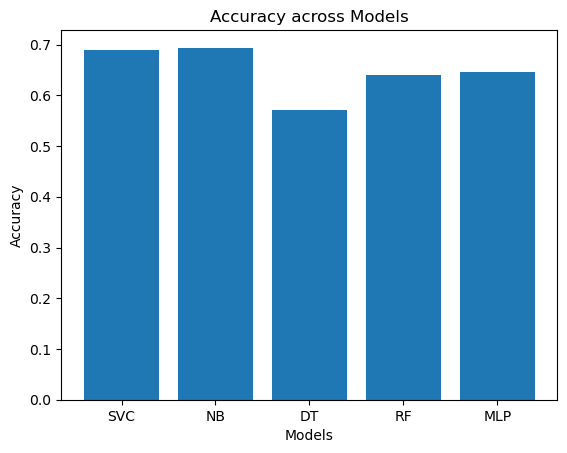

In [9]:
import matplotlib.pyplot as plt

categories = models
values = acc

fig, ax = plt.subplots()
ax.bar(categories, values)

ax.set_title('Accuracy across Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

plt.show()

In [10]:
print("The Best Model to work is ",models[acc.index(max(acc))]," with an accuraccy of ",max(acc))

The Best Model to work is  NB  with an accuraccy of  0.6937553464499572


#### The Best Model : Naive Bayes  
#### Accuraccy : 0.6937553464499572

In [11]:
test_x = [df["Sentence"][3456]]
test_y = df["Sentiment"][3456]

print("The Prediction for the sentence '",test_x[0],"' is ",nb.predict(fe.transform(test_x))[0], " but the actual rating is ",test_y,sep="")

The Prediction for the sentence 'The contracts of the employees , 96 of whom are blue-collar workers , will be ended between March and August 2011 .' is neutral but the actual rating is negative


##### Sentence : The contracts of the employees , 96 of whom are blue-collar workers , will be ended between March and August 2011 .
- Rating    : Negative
- Predicted : Neutral

# TfidfVectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

fe = TfidfTransformer()
x_train = fe.fit_transform(x_train)
x_test = fe.transform(x_test)

models_tf = []
acc_tf = []

# Naive-Bayes

In [13]:
nb = MultinomialNB()
nb.fit(X=x_train,y=y_train)

pred = nb.predict(x_test)
nb_acc = accuracy_score(y_pred=pred,y_true=y_test)
models_tf.append("NB")
acc_tf.append(nb_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       1.00      0.04      0.07       170
     neutral       0.63      0.97      0.77       617
    positive       0.73      0.41      0.53       382

    accuracy                           0.65      1169
   macro avg       0.79      0.47      0.45      1169
weighted avg       0.72      0.65      0.59      1169



## SVM

In [14]:
svm = SVC()
svm.fit(X=x_train,y=y_train)

pred = svm.predict(x_test)
svm_acc = accuracy_score(y_pred=pred,y_true=y_test)
models_tf.append("SVC")
acc_tf.append(svm_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.22      0.09      0.13       170
     neutral       0.67      0.86      0.75       617
    positive       0.79      0.64      0.71       382

    accuracy                           0.68      1169
   macro avg       0.56      0.53      0.53      1169
weighted avg       0.65      0.68      0.65      1169



## Decision Tree

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X=x_train,y=y_train)

pred = dt.predict(x_test)
dt_acc = accuracy_score(y_pred=pred,y_true=y_test)
models_tf.append("DT")
acc_tf.append(dt_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.14      0.18      0.16       170
     neutral       0.64      0.64      0.64       617
    positive       0.59      0.53      0.56       382

    accuracy                           0.53      1169
   macro avg       0.46      0.45      0.45      1169
weighted avg       0.55      0.53      0.54      1169



## Random Forest

In [16]:
rf = RandomForestClassifier()
rf.fit(X=x_train,y=y_train)

pred = rf.predict(x_test)
fr_acc = accuracy_score(y_pred=pred,y_true=y_test)
models_tf.append("RF")
acc_tf.append(fr_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.12      0.08      0.10       170
     neutral       0.64      0.81      0.71       617
    positive       0.76      0.56      0.65       382

    accuracy                           0.62      1169
   macro avg       0.51      0.48      0.49      1169
weighted avg       0.61      0.62      0.60      1169



## Multi Layer Perceptron

In [17]:
mlp = MLPClassifier()
mlp.fit(X=x_train,y=y_train)

pred = mlp.predict(x_test)
mlp_acc = accuracy_score(y_pred=pred,y_true=y_test)
models_tf.append("MLP")
acc_tf.append(mlp_acc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.27      0.25      0.26       170
     neutral       0.69      0.73      0.71       617
    positive       0.74      0.70      0.72       382

    accuracy                           0.65      1169
   macro avg       0.57      0.56      0.56      1169
weighted avg       0.65      0.65      0.65      1169



## Plot TfidfVectorizer

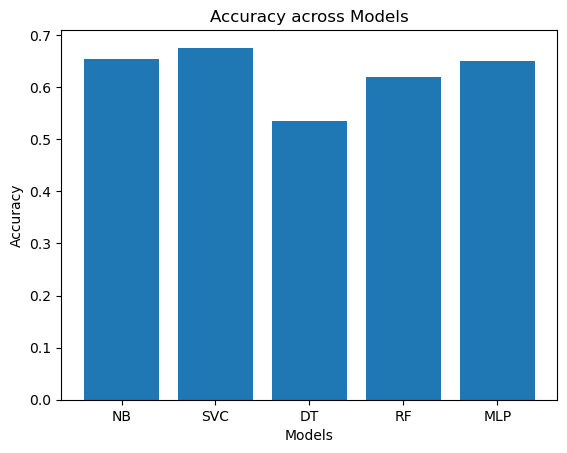

In [18]:
categories = models_tf
values = acc_tf

fig, ax = plt.subplots()
ax.bar(categories, values)

ax.set_title('Accuracy across Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

plt.show()

In [19]:
print("The Best Model to work is ",models_tf[acc_tf.index(max(acc_tf))]," with an accuraccy of ",max(acc_tf))

The Best Model to work is  SVC  with an accuraccy of  0.6757912745936698


#### The Best Model : Support Vector Classifier
#### Accuraccy : 0.6757912745936698

In [25]:
test_x = [df["Sentence"][3456]]
test_y = df["Sentiment"][3456]

print("The Prediction for the sentence '",test_x[0],"' is ",nb.predict(x_test[100])[0], " but the actual rating is ",test_y,sep="")

The Prediction for the sentence 'The contracts of the employees , 96 of whom are blue-collar workers , will be ended between March and August 2011 .' is positive but the actual rating is negative


##### Sentence : The contracts of the employees , 96 of whom are blue-collar workers , will be ended between March and August 2011 .
- Rating    : Negative
- Predicted : Positive

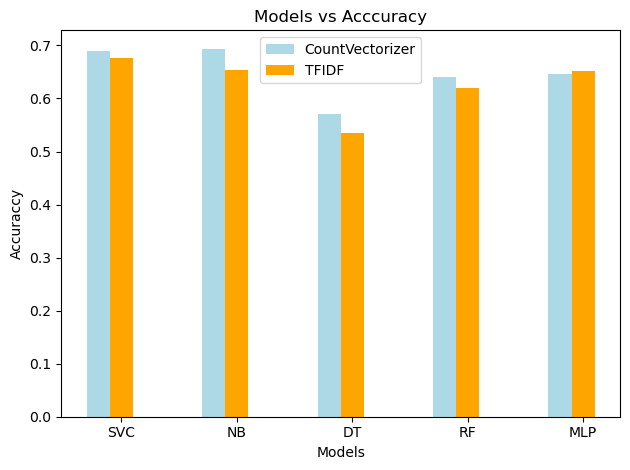

In [20]:
categories = models
values_1 = acc
values_2 = []

for i in models:
    values_2.append(acc_tf[models_tf.index(i)])

fig, ax = plt.subplots()

x = np.arange(len(categories))  # the label locations
width = 0.2  # the width of the bars

bars1 = ax.bar(x - width, values_1, width, label='CountVectorizer', color='lightblue')
bars2 = ax.bar(x, values_2, width, label='TFIDF', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuraccy')
ax.set_title('Models vs Acccuracy')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()

plt.show()